# Tarea 2

In [11]:
import numpy as np
import scipy as sp
from scipy import interpolate 
import matplotlib.pyplot as plt

In [72]:
N=10

Usando interpolación lineal:

In [73]:
x=np.linspace(0,2*np.pi,N)
f=interpolate.interp1d(x,(np.sin(x))**2,kind="linear")

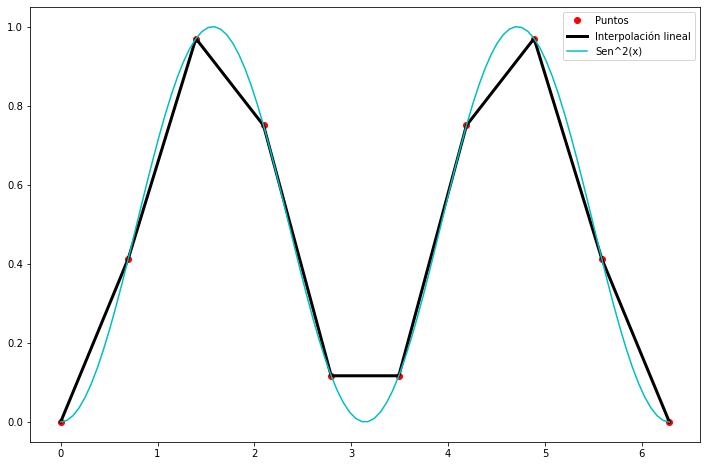

In [74]:
X=np.linspace(0,2*np.pi, 100)
plt.figure(figsize=(12,8))
plt.plot(x,f(x),"ro",label="Puntos")
plt.plot(X,f(X),"k-",lw=3,label="Interpolación lineal")
plt.plot(X,(np.sin(X))**2,"c-",label="Sen^2(x)")
plt.legend()

plt.show()

Usando interpolación de Lagrange: 

In [75]:
L=interpolate.lagrange(x,(np.sin(x))**2)
print(L)

            9            8           7          6         5         4
-7.589e-19 x - 0.001256 x + 0.03157 x - 0.3135 x + 1.548 x - 3.899 x
         3         2
 + 4.57 x - 2.022 x + 0.784 x


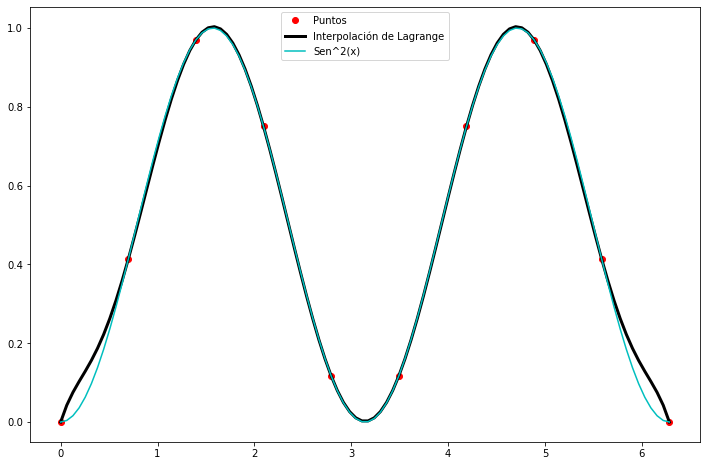

In [76]:
X=np.linspace(0,2*np.pi,100)
plt.figure(figsize=(12,8))
plt.plot(x,f(x),"ro",label="Puntos")
plt.plot(X,L(X),"k-",lw=3,label="Interpolación de Lagrange")
plt.plot(X,(np.sin(X))**2,"c-",label="Sen^2(x)")
plt.legend()

plt.show()

Usando Hermite:

In [85]:
X=np.linspace(0,2*np.pi, 100)
y=(np.sin(x))**2
yprime=np.sin(2*x)

In [89]:
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
# and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
# differences using derivatives
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum    



Hinterp = hermite(x, y, yprime, X)
Hinterp

array([ 0.00000000e+00, -1.84229494e+01, -4.31748324e+01, -5.49878192e+01,
       -5.30674190e+01, -4.27136247e+01, -2.95874506e+01, -1.76190223e+01,
       -8.72224203e+00, -3.25454391e+00, -6.54923218e-01,  4.02259358e-03,
       -3.59536791e-01, -1.03611212e+00, -1.58776645e+00, -1.82390519e+00,
       -1.73419278e+00, -1.41132343e+00, -9.83933505e-01, -5.69260586e-01,
       -2.47317743e-01, -5.34718435e-02,  1.60256493e-02, -8.55154294e-03,
       -8.49446343e-02, -1.71703582e-01, -2.37116940e-01, -2.63585173e-01,
       -2.47833615e-01, -1.98043713e-01, -1.29271498e-01, -5.84888242e-02,
       -3.22681859e-04,  3.58160335e-02,  4.69365132e-02,  3.60960843e-02,
        1.08184417e-02, -1.91754758e-02, -4.43650945e-02, -5.74642733e-02,
       -5.47410206e-02, -3.64528069e-02, -6.41265532e-03,  2.91395550e-02,
        6.30753115e-02,  8.89899866e-02,  1.02567285e-01,  1.02441330e-01,
        9.04101187e-02,  7.09819510e-02,  5.03621139e-02,  3.50901595e-02,
        3.06019898e-02,  

In [90]:
P=np.poly1d(Hinterp)
print (P)

        98         97         96         95         94         93
-18.42 x  - 43.17 x  - 54.99 x  - 53.07 x  - 42.71 x  - 29.59 x 
          92         91         90          89            88
 - 17.62 x  - 8.722 x  - 3.255 x  - 0.6549 x  + 0.004023 x 
           87         86         85         84         83         82
 - 0.3595 x  - 1.036 x  - 1.588 x  - 1.824 x  - 1.734 x  - 1.411 x 
           81          80          79           78           77
 - 0.9839 x  - 0.5693 x  - 0.2473 x  - 0.05347 x  + 0.01603 x 
             76           75          74          73          72
 - 0.008552 x  - 0.08494 x  - 0.1717 x  - 0.2371 x  - 0.2636 x 
           71         70          69           68             67
 - 0.2478 x  - 0.198 x  - 0.1293 x  - 0.05849 x  - 0.0003227 x 
            66           65          64           63           62
 + 0.03582 x  + 0.04694 x  + 0.0361 x  + 0.01082 x  - 0.01918 x 
            61           60           59           58            57
 - 0.04437 x  - 0.05746 x  

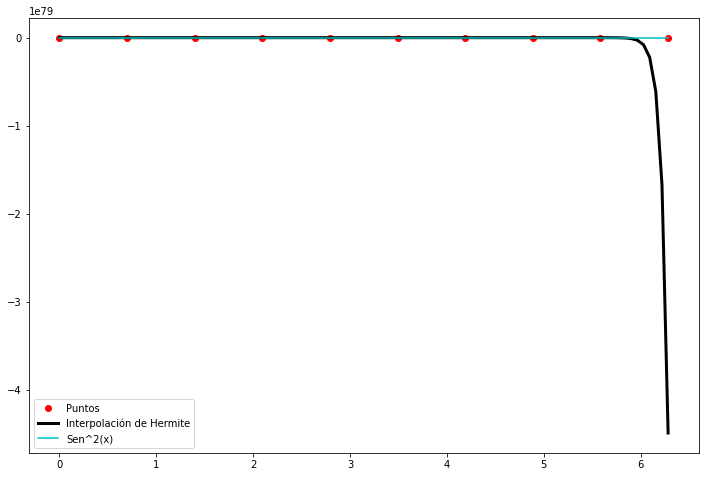

In [91]:
Y=np.linspace(0, 2*np.pi,100)
plt.figure(figsize=(12,8))
plt.plot(x,f(x),"ro",label="Puntos")
plt.plot(Y,P(Y),"k-",lw=3,label="Interpolación de Hermite")
plt.plot(Y,(np.sin(Y))**2,"c-",label="Sen^2(x)")
plt.legend()

plt.show()